<a href="https://colab.research.google.com/github/mchhour31/NN_work/blob/main/thompson_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
df = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [15]:
import random

n_rows, n_cols = 500, 10
ads_selected = []
number_of_rewards_0 = [0] * n_rows
number_of_rewards_1 = [0] * n_rows
total_reward = 0

for n in range(n_rows):
  ad = 0
  max_random = 0

  for i in range(n_cols):
    random_beta = random.betavariate(number_of_rewards_1[i] + 1, number_of_rewards_0[i] + 1)

    if random_beta > max_random:
      max_random = random_beta
      ad = i

  ads_selected.append(ad)  
  reward = df.values[n, ad]

  if reward == 1:
    number_of_rewards_1[ad] += 1
  else:
    number_of_rewards_0[ad] += 1

  total_reward += reward

## Visualising the results - Histogram

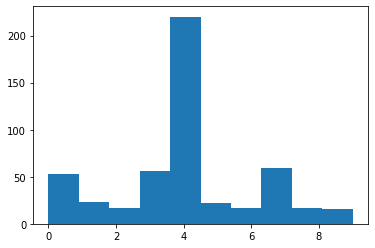

In [16]:
plt.hist(ads_selected)
plt.show()